In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '../Data/annotation_features_training_compostite_2023_Features.csv'
df = pd.read_csv(file_path)

In [3]:
cols = [
    "2023_01_Data_band_1","2023_01_Data_band_2","2023_01_Data_band_3","2023_01_Data_band_4","2023_01_Data_band_5","2023_01_Data_band_6","2023_01_Data_band_7","2023_01_Data_band_8","2023_01_Data_band_9","2023_01_Data_band_10",
    "2023_02_Data_band_1","2023_02_Data_band_2","2023_02_Data_band_3","2023_02_Data_band_4","2023_02_Data_band_5","2023_02_Data_band_6","2023_02_Data_band_7","2023_02_Data_band_8","2023_02_Data_band_9","2023_02_Data_band_10",
    "2023_03_Data_band_1","2023_03_Data_band_2","2023_03_Data_band_3","2023_03_Data_band_4","2023_03_Data_band_5","2023_03_Data_band_6","2023_03_Data_band_7","2023_03_Data_band_8","2023_03_Data_band_9","2023_03_Data_band_10",
    "2023_04_Data_band_1","2023_04_Data_band_2","2023_04_Data_band_3","2023_04_Data_band_4","2023_04_Data_band_5","2023_04_Data_band_6","2023_04_Data_band_7","2023_04_Data_band_8","2023_04_Data_band_9","2023_04_Data_band_10",
    "2023_05_Data_band_1","2023_05_Data_band_2","2023_05_Data_band_3","2023_05_Data_band_4","2023_05_Data_band_5","2023_05_Data_band_6","2023_05_Data_band_7","2023_05_Data_band_8","2023_05_Data_band_9","2023_05_Data_band_10",
    "2023_06_Data_band_1","2023_06_Data_band_2","2023_06_Data_band_3","2023_06_Data_band_4","2023_06_Data_band_5","2023_06_Data_band_6","2023_06_Data_band_7","2023_06_Data_band_8","2023_06_Data_band_9","2023_06_Data_band_10",
    "2023_07_Data_band_1","2023_07_Data_band_2","2023_07_Data_band_3","2023_07_Data_band_4","2023_07_Data_band_5","2023_07_Data_band_6","2023_07_Data_band_7","2023_07_Data_band_8","2023_07_Data_band_9","2023_07_Data_band_10",
    "2023_08_Data_band_1","2023_08_Data_band_2","2023_08_Data_band_3","2023_08_Data_band_4","2023_08_Data_band_5","2023_08_Data_band_6","2023_08_Data_band_7","2023_08_Data_band_8","2023_08_Data_band_9","2023_08_Data_band_10",
    "2023_09_Data_band_1","2023_09_Data_band_2","2023_09_Data_band_3","2023_09_Data_band_4","2023_09_Data_band_5","2023_09_Data_band_6","2023_09_Data_band_7","2023_09_Data_band_8","2023_09_Data_band_9","2023_09_Data_band_10",
    "2023_10_Data_band_1","2023_10_Data_band_2","2023_10_Data_band_3","2023_10_Data_band_4","2023_10_Data_band_5","2023_10_Data_band_6","2023_10_Data_band_7","2023_10_Data_band_8","2023_10_Data_band_9","2023_10_Data_band_10",
    "2023_11_Data_band_1","2023_11_Data_band_2","2023_11_Data_band_3","2023_11_Data_band_4","2023_11_Data_band_5","2023_11_Data_band_6","2023_11_Data_band_7","2023_11_Data_band_8","2023_11_Data_band_9","2023_11_Data_band_10",
    "2023_12_Data_band_1","2023_12_Data_band_2","2023_12_Data_band_3","2023_12_Data_band_4","2023_12_Data_band_5","2023_12_Data_band_6","2023_12_Data_band_7","2023_12_Data_band_8","2023_12_Data_band_9","2023_12_Data_band_10",
        ]

df[cols] = df[cols] / 10000

In [4]:
import pandas as pd
import numpy as np

months = [f"{i:02d}" for i in range(1, 13)]  # ['01', '02', ..., '12']

for month in months:
 
    prefix = f"2023_{month}_Data_band_"
    
    #     band_1 = Blue
    #     band_2 = Green
    #     band_3 = Red
    #     band_7 = NIR

    red_col = prefix + "3"    # Red
    nir_col = prefix + "7"    # NIR
    green_col = prefix + "2"  # Green
    

    red = df[red_col]
    nir = df[nir_col]
    green = df[green_col]
    
    # ---------------NDVI ---------------
    # NDVI = (NIR - Red) / (NIR + Red)
    df[f"2023_{month}_ndvi_band_1"] = (
        (nir - red) / (nir + red + 1e-6)  
    )
    
    # ---------------NDWI ---------------
    # (Green - NIR) / (Green + NIR) 
    df[f"2023_{month}_ndwi_band_1"] = (
        (green - nir) / (green + nir + 1e-6)
    )
    
    # ---------------  GNDVI --------------
    # GNDVI = (NIR - Green) / (NIR + Green)
    df[f"2023_{month}_gndvi_band_1"] = (
        (nir - green) / (nir + green + 1e-6)
    )
    
    # ---------------  MSAVI --------------
    # MSAVI = [2*NIR + 1 - sqrt((2*NIR+1)^2 - 8*(NIR - RED))] / 2
    df[f"2023_{month}_msavi_band_1"] = 0.5 * (
        (2 * nir + 1) - np.sqrt((2 * nir + 1)**2 - 8 * (nir - red))
    )


In [5]:
df

,Class,Canopy,Methods,Percent,X,Y,2023_01_Data_band_1,2023_01_Data_band_2,2023_01_Data_band_3,2023_01_Data_band_4,...,Rivers_Distance_band_1_band_1,Population_KD_band_1_band_1,Livestock_2015_KD_band_1_band_1,Building_KD_band_1_band_1,Aspect_band_1_band_1,CanopyHeight_ROI_band_1,M50,M100,M500,M1000
0,9,1.0,2.0,15.0,37.133880,0.372123,0.0941,0.1510,0.2302,0.2917,...,262.497833,71.964180,315.335083,0.012451,107.686027,0,4018229.0,1005459.0,40172.0,10096.0
1,9,2.0,2.0,20.0,37.133884,0.372211,0.0834,0.1370,0.2046,0.2789,...,264.690887,72.103287,315.349518,0.012505,182.403366,0,4018229.0,1005459.0,40172.0,10096.0
2,9,1.0,2.0,10.0,37.133966,0.372214,0.0970,0.1582,0.2410,0.2868,...,274.443603,72.356094,315.366089,0.012563,188.897965,0,4018229.0,1005459.0,40172.0,10096.0
3,2,NaN,2.0,NaN,37.133961,0.372302,0.1005,0.1643,0.2498,0.2815,...,276.746094,72.494011,315.380890,0.012617,273.546020,0,4020928.0,1005459.0,40172.0,10096.0
4,9,1.0,2.0,10.0,37.133792,0.372221,0.0815,0.1408,0.2183,0.2702,...,254.956116,71.849350,315.332947,0.012448,193.586395,0,4018228.0,1005458.0,40172.0,10096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,5,NaN,NaN,NaN,37.390507,0.303173,0.0810,0.1162,0.1743,0.2126,...,1039.734985,7.935099,286.022156,0.098710,34.656223,0,NaN,NaN,NaN,NaN
1993,2,NaN,NaN,NaN,37.387829,0.292655,0.0873,0.1231,0.1847,0.2169,...,852.927185,7.805482,293.128601,0.247697,198.434952,0,NaN,NaN,NaN,NaN
1994,5,NaN,NaN,NaN,37.315773,0.376208,0.0470,0.0704,0.0787,0.1426,...,561.730041,7.093152,304.098633,0.072463,70.123627,0,NaN,NaN,NaN,NaN
1995,2,NaN,NaN,NaN,37.299536,0.454051,0.0812,0.1240,0.1996,0.2447,...,224.756516,0.000000,297.764740,0.019057,90.000000,0,NaN,NaN,NaN,NaN


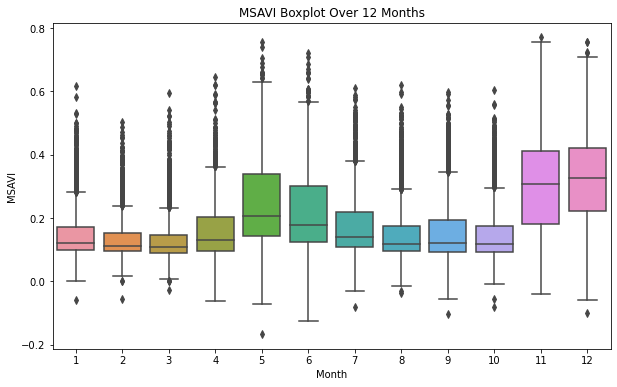

In [12]:
month_cols = [f"2023_{m:02d}_msavi_band_1" for m in range(1, 13)]

df_melt = df[month_cols].melt(
    value_name="MSAVI",      
    var_name="Month_Column"  
)


df_melt["Month"] = df_melt["Month_Column"].str.extract(r"2023_(\d{2})_")

df_melt["Month"] = df_melt["Month"].astype(int)

plt.figure(figsize=(10, 6))  
sns.boxplot(data=df_melt, x="Month", y="MSAVI")
plt.title("MSAVI Boxplot Over 12 Months")
plt.xlabel("Month")
plt.ylabel("MSAVI")


plt.show()

In [7]:
df.to_csv("/home/ji.song/blue/InvasiveSpecies_Kenya_Annotation/annotation_features_training_compostite_2023_Features_Divide10000.csv", index=False, encoding="utf-8")